# Introduction

This project aims to develop and share visualization skills gathered during the **Codecademy Data Scientist: Machine Learning Specialist** course path.

For this project, data on GDP and life expectancy from the **World Health Organization** and the **World Bank** will be analyzed to identify the relationship between GDP and life expectancy in six countries.

During this project, data will be analyzed, prepared, and plotted to answer questions in a meaningful way.

After performing my analysis, I will create a blog post to share my findings.


**Additional Information - Data columns description:** 

- **Country** - nation;
- **Year** - the year for the observation;
- **Life expectancy at birth (years)** - life expectancy value in years;
- **GDP** - Gross Domestic Product in U.S. dollars.


In [870]:
# Importing necessary packages

import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import shapiro
%matplotlib inline

In [871]:
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

# 1 - Data upload and overview | Project Scoping

## 1.1 - Upload, read and data overview

In [874]:
gdp_life = pd.read_csv('gdp_life_expectancy.csv')

print(gdp_life.head(), "\n")

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10 



## 1.2 - Setting Project Goals (Scoping) - Questions to Answer:

- **What is the relationship between life expectancy and GDP for these six countries?**

- **What is the variation in GDP per year for each country? Are there significant variation?**

- **What is the variation in life expectancy per year for each country? Are there significant variation?**

- **What can we expect for the near future?**

# 2 - Data Pre-processing

## 2.1 - Handling Missing Values

In [881]:
print(gdp_life.isnull().sum())

Country                             0
Year                                0
Life expectancy at birth (years)    0
GDP                                 0
dtype: int64


## 2.2 - Verifying variable types

In [883]:
print(gdp_life.dtypes)


Country                              object
Year                                  int64
Life expectancy at birth (years)    float64
GDP                                 float64
dtype: object


## 2.3 - Turning variable names manipulation-friendly

In [885]:
gdp_life.rename(columns={
    'Country': 'country',
    'Year': 'year',
    'Life expectancy at birth (years)': 'life_expectancy',
    'GDP': 'gdp'
}, inplace=True)

print(gdp_life.columns)
print(gdp_life.head())

Index(['country', 'year', 'life_expectancy', 'gdp'], dtype='object')
  country  year  life_expectancy           gdp
0   Chile  2000             77.3  7.786093e+10
1   Chile  2001             77.3  7.097992e+10
2   Chile  2002             77.8  6.973681e+10
3   Chile  2003             77.9  7.564346e+10
4   Chile  2004             78.0  9.921039e+10


## 2.4 - Ensuring the right variable type

In [887]:
gdp_life['country'] = gdp_life['country'].astype(str)
gdp_life['year'] = gdp_life['year'].astype(int)
gdp_life['life_expectancy'] = gdp_life['life_expectancy'].astype(float)
gdp_life['gdp'] = gdp_life['gdp'].astype(float)

print(gdp_life.dtypes)

country             object
year                 int32
life_expectancy    float64
gdp                float64
dtype: object


## 3 - Exploratory Data Analysis (EDA)

## 3.1 - Descriptive Statistics

In [890]:
# Summary Statistics for Global Wild Data per year for the six countries
print(gdp_life.groupby('year')['gdp'].describe(), "\n")
print(gdp_life.groupby('year')['life_expectancy'].describe(), "\n")

      count          mean           std           min           25%  \
year                                                                  
2000    6.0  2.371583e+12  3.951878e+12  6.689958e+09  2.293077e+11   
2001    6.0  2.448752e+12  4.062290e+12  6.777385e+09  2.344109e+11   
2002    6.0  2.561221e+12  4.211437e+12  6.342116e+09  2.376926e+11   
2003    6.0  2.743446e+12  4.396380e+12  5.727592e+09  2.350536e+11   
2004    6.0  2.991647e+12  4.689670e+12  5.805598e+09  2.669748e+11   
2005    6.0  3.207074e+12  4.981507e+12  5.755215e+09  3.088102e+11   
2006    6.0  3.463349e+12  5.268510e+12  5.443896e+09  3.574112e+11   
2007    6.0  3.785750e+12  5.474100e+12  5.291950e+09  3.910720e+11   
2008    6.0  4.055986e+12  5.547122e+12  4.415703e+09  4.100485e+11   
2009    6.0  4.000653e+12  5.476381e+12  8.621574e+09  3.530290e+11   
2010    6.0  4.299587e+12  5.729365e+12  1.014186e+10  4.266860e+11   
2011    6.0  4.710965e+12  5.999836e+12  1.209845e+10  4.819865e+11   
2012  

In [891]:
# Summary Statistics for Global Wild Data per country (year range: 2000-2015)
print(gdp_life.groupby('country')['gdp'].describe(), "\n")
print(gdp_life.groupby('country')['life_expectancy'].describe(), "\n")

                          count          mean           std           min  \
country                                                                     
Chile                      16.0  1.697888e+11  7.687884e+10  6.973681e+10   
China                      16.0  4.957714e+12  3.501096e+12  1.211350e+12   
Germany                    16.0  3.094776e+12  6.674862e+11  1.949950e+12   
Mexico                     16.0  9.766506e+11  2.095716e+11  6.836480e+11   
United States of America   16.0  1.407500e+13  2.432694e+12  1.030000e+13   
Zimbabwe                   16.0  9.062580e+09  4.298310e+09  4.415703e+09   

                                   25%           50%           75%  \
country                                                              
Chile                     9.387303e+10  1.729975e+11  2.449515e+11   
China                     1.881585e+12  4.075195e+12  7.819550e+12   
Germany                   2.740870e+12  3.396350e+12  3.596078e+12   
Mexico                    7.63091

In [892]:
# Descriptive statistics for Global GDP per year for the six countries

gdp_mean_year = gdp_life.groupby('year')['gdp'].mean()
print(gdp_mean_year)

gdp_median_year = gdp_life.groupby('year')['gdp'].median()
print(gdp_median_year)

gdp_std_year = gdp_life.groupby('year')['gdp'].std()
print(gdp_std_year, "\n")

year
2000    2.371583e+12
2001    2.448752e+12
2002    2.561221e+12
2003    2.743446e+12
2004    2.991647e+12
2005    3.207074e+12
2006    3.463349e+12
2007    3.785750e+12
2008    4.055986e+12
2009    4.000653e+12
2010    4.299587e+12
2011    4.710965e+12
2012    4.962082e+12
2013    5.269258e+12
2014    5.558059e+12
2015    5.658565e+12
Name: gdp, dtype: float64
year
2000    9.474990e+11
2001    1.032052e+12
2002    1.106055e+12
2003    1.186787e+12
2004    1.362809e+12
2005    1.576158e+12
2006    1.858706e+12
2007    2.241710e+12
2008    2.426825e+12
2009    2.156480e+12
2010    2.234110e+12
2011    2.464445e+12
2012    2.365290e+12
2013    2.507245e+12
2014    2.594535e+12
2015    2.263935e+12
Name: gdp, dtype: float64
year
2000    3.951878e+12
2001    4.062290e+12
2002    4.211437e+12
2003    4.396380e+12
2004    4.689670e+12
2005    4.981507e+12
2006    5.268510e+12
2007    5.474100e+12
2008    5.547122e+12
2009    5.476381e+12
2010    5.729365e+12
2011    5.999836e+12
2012    6

In [893]:
# Descriptive statistics for Global life expectancy per year for the six countries

gdp_mean_year = gdp_life.groupby('year')['life_expectancy'].mean()
print(gdp_mean_year)

gdp_median_year = gdp_life.groupby('year')['life_expectancy'].median()
print(gdp_median_year)

gdp_std_year = gdp_life.groupby('year')['life_expectancy'].std()
print(gdp_std_year, "\n")

year
2000    70.766667
2001    70.833333
2002    70.950000
2003    71.033333
2004    71.300000
2005    71.483333
2006    71.950000
2007    72.300000
2008    72.666667
2009    73.066667
2010    73.483333
2011    74.200000
2012    74.600000
2013    74.966667
2014    75.316667
2015    75.716667
Name: life_expectancy, dtype: float64
year
2000    75.80
2001    75.95
2002    76.00
2003    76.10
2004    76.45
2005    76.40
2006    76.80
2007    77.05
2008    76.90
2009    77.10
2010    77.15
2011    77.40
2012    77.55
2013    77.75
2014    77.85
2015    78.00
Name: life_expectancy, dtype: float64
year
2000    12.344499
2001    12.692938
2002    12.979330
2003    13.152592
2004    13.377743
2005    13.316969
2006    13.159293
2007    12.743940
2008    12.178615
2009    11.478792
2010    10.524527
2011     9.678843
2012     9.047210
2013     8.538072
2014     8.147985
2015     7.619033
Name: life_expectancy, dtype: float64 



In [894]:
# Descriptive statistics for Global GDP per country (year range: 2000-2015) 

gdp_mean_year = gdp_life.groupby('country')['gdp'].mean()
print(gdp_mean_year)

gdp_median_year = gdp_life.groupby('country')['gdp'].median()
print(gdp_median_year)

gdp_std_year = gdp_life.groupby('country')['gdp'].std()
print(gdp_std_year, "\n")

country
Chile                       1.697888e+11
China                       4.957714e+12
Germany                     3.094776e+12
Mexico                      9.766506e+11
United States of America    1.407500e+13
Zimbabwe                    9.062580e+09
Name: gdp, dtype: float64
country
Chile                       1.729975e+11
China                       4.075195e+12
Germany                     3.396350e+12
Mexico                      1.004376e+12
United States of America    1.445000e+13
Zimbabwe                    6.733671e+09
Name: gdp, dtype: float64
country
Chile                       7.687884e+10
China                       3.501096e+12
Germany                     6.674862e+11
Mexico                      2.095716e+11
United States of America    2.432694e+12
Zimbabwe                    4.298310e+09
Name: gdp, dtype: float64 



In [895]:
# Descriptive statistics for Global life expectancy per country (year range: 2000-2015)

gdp_mean_year = gdp_life.groupby('country')['life_expectancy'].mean()
print(gdp_mean_year)

gdp_median_year = gdp_life.groupby('country')['life_expectancy'].median()
print(gdp_median_year)

gdp_std_year = gdp_life.groupby('country')['life_expectancy'].std()
print(gdp_std_year, "\n")

country
Chile                       78.94375
China                       74.26250
Germany                     79.65625
Mexico                      75.71875
United States of America    78.06250
Zimbabwe                    50.09375
Name: life_expectancy, dtype: float64
country
Chile                       79.00
China                       74.45
Germany                     79.85
Mexico                      75.65
United States of America    78.15
Zimbabwe                    47.40
Name: life_expectancy, dtype: float64
country
Chile                       1.058911
China                       1.318016
Germany                     0.975000
Mexico                      0.620987
United States of America    0.832566
Zimbabwe                    5.940311
Name: life_expectancy, dtype: float64 



In [896]:
# Finding in which year, each country had its minimum gdp

min_gdp_year = gdp_life.loc[gdp_life.groupby('country')['gdp'].idxmin()][['country', 'year', 'gdp']] 

print("Year with Minimum GDP for each country:", min_gdp_year) 


Year with Minimum GDP for each country:                      country  year           gdp
2                      Chile  2002  6.973681e+10
16                     China  2000  1.211350e+12
32                   Germany  2000  1.949950e+12
48                    Mexico  2000  6.836480e+11
64  United States of America  2000  1.030000e+13
88                  Zimbabwe  2008  4.415703e+09


In [897]:
# Finding in which year, each country had its minimum life expectancy

min_life_expectancy_year = gdp_life.loc[gdp_life.groupby('country')['life_expectancy'].idxmin()][['country', 'year', 'life_expectancy']]

print("\nYear with Minimum Life Expectancy for each country:", min_life_expectancy_year)


Year with Minimum Life Expectancy for each country:                      country  year  life_expectancy
0                      Chile  2000             77.3
16                     China  2000             71.7
32                   Germany  2000             78.0
48                    Mexico  2000             74.8
64  United States of America  2000             76.8
84                  Zimbabwe  2004             44.3


In [898]:
# Finding in which year, each country had its maximum gdp

max_gdp_year = gdp_life.loc[gdp_life.groupby('country')['gdp'].idxmax()][['country', 'year', 'gdp']]

print("\nYear with Maximum GDP for each country:", max_gdp_year) 



Year with Maximum GDP for each country:                      country  year           gdp
13                     Chile  2013  2.783840e+11
31                     China  2015  1.106470e+13
46                   Germany  2014  3.890610e+12
62                    Mexico  2014  1.298460e+12
79  United States of America  2015  1.810000e+13
95                  Zimbabwe  2015  1.630467e+10


In [899]:
 # Finding in which year, each country had its maximum life expectancy

max_life_expectancy_year = gdp_life.loc[gdp_life.groupby('country')['life_expectancy'].idxmax()][['country', 'year', 'life_expectancy']]

print("\nYear with Maximum Life Expectancy for each country:", max_life_expectancy_year) 



Year with Maximum Life Expectancy for each country:                      country  year  life_expectancy
15                     Chile  2015             80.5
31                     China  2015             76.1
47                   Germany  2015             81.0
63                    Mexico  2015             76.7
79  United States of America  2015             79.3
95                  Zimbabwe  2015             60.7


#### EDA analysis and notes for the period between 2000 - 2015:

- **Chile**:

- **CHina**:

- **Germany**:

- **Mexico**:

- **United States of America**:

- **Zimbabwe**:

## 3.2 - Visualizations

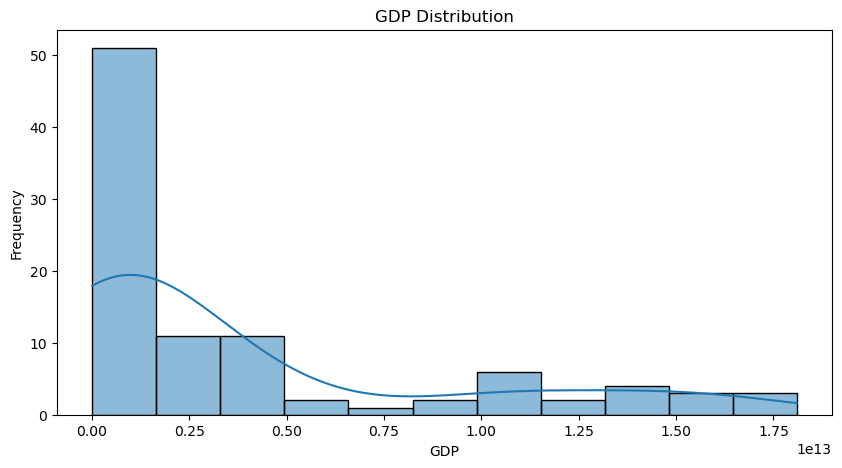

<Figure size 640x480 with 0 Axes>

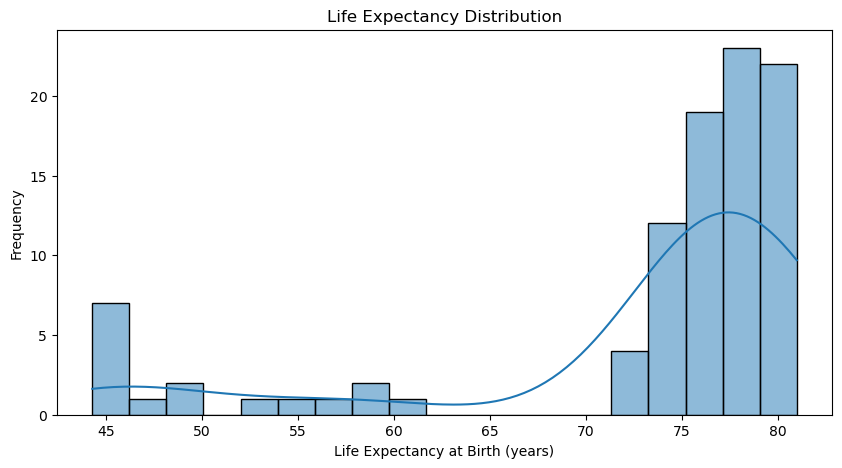

In [902]:
# Histogram for GDP

plt.figure(figsize=(10, 5))
sns.histplot(gdp_life['gdp'], kde=True)
plt.title('GDP Distribution')
plt.xlabel('GDP')
plt.ylabel('Frequency')
plt.show()
plt.clf()

# Histogram for Life Expectancy
plt.figure(figsize=(10,5))
sns.histplot(gdp_life['life_expectancy'], kde=True)
plt.title('Life Expectancy Distribution')
plt.xlabel('Life Expectancy at Birth (years)')
plt.ylabel('Frequency')
plt.show()

# Important to note:
The two charts above conducted me through a hard path to find the best visualization for the dataset. Because these two variables are not following a normal distribution, I performed many trial and error exercises to find the best way to show my findings. The result: To much commented cells on section 6!

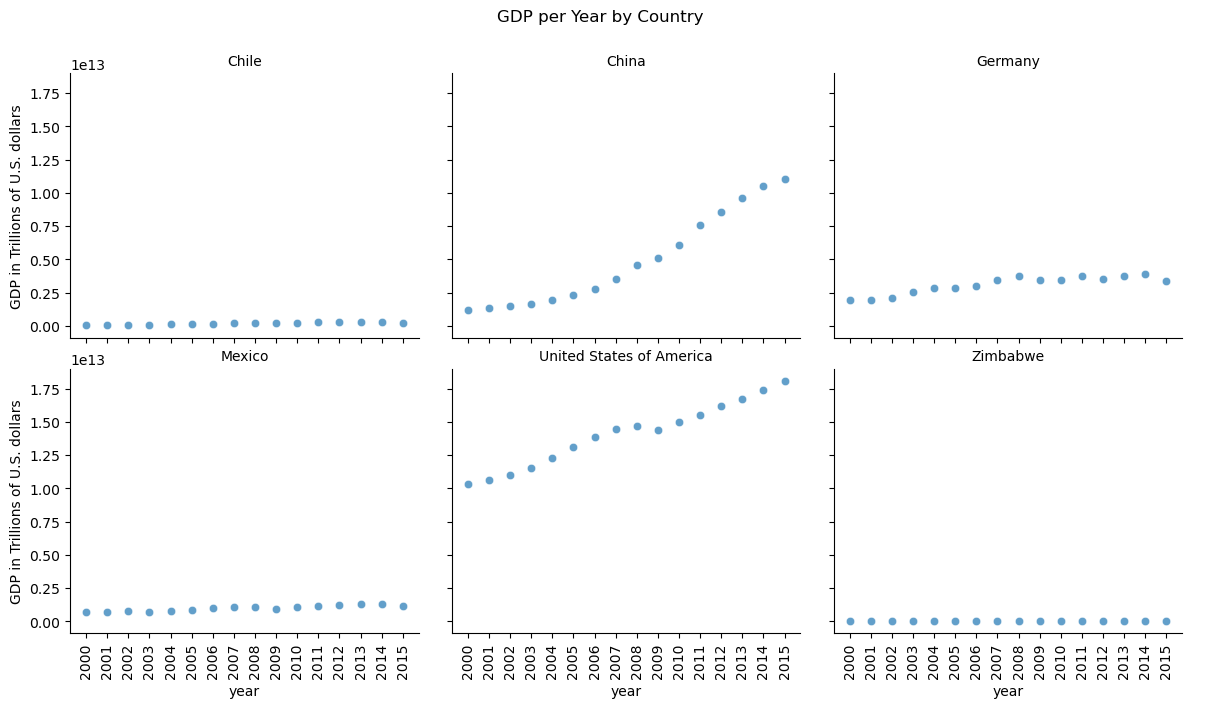

<Figure size 640x480 with 0 Axes>

In [904]:
# Grid for GDP

g = sns.FacetGrid(gdp_life, col='country', col_wrap=3, height=4)
g.map(sns.scatterplot, 'year', 'gdp', alpha=0.7)
g.add_legend()
g.set_axis_labels('year', 'GDP in Trillions of U.S. dollars')
g.set_titles('{col_name}')
for ax in g.axes.flat:
    ax.set_xticks(gdp_life['year'].unique())  # Set x-ticks based on unique years
    ax.set_xticklabels(gdp_life['year'].unique(), rotation=90)  # Set x-tick labels
plt.subplots_adjust(top=0.9, bottom=0.2)
g.fig.suptitle('GDP per Year by Country')
plt.show()
plt.clf()

#### Analysis:

According to the data, I can observe the following GDP developments between 2000 and 2015:

- **Chile and Zimbabwe**: Both countries have a steady, low GDP development.

- **Mexico**: Exhibits low GDP development with some fluctuations.

- **United States of America (USA)**: Shows a high and increasing GDP development.

- **China**: Demonstrates significant development during this period, starting with a very low GDP in 2000 and reaching a mid-high GDP by 2015.

- **Germany**: Has a moderately high GDP development compared to Chile, Mexico and Zimbabwe, but lower than the USA and China. It's important to note thar Germany's GDP development is almost steady, with some important fluctuations in 2004, 2008, and 2011.

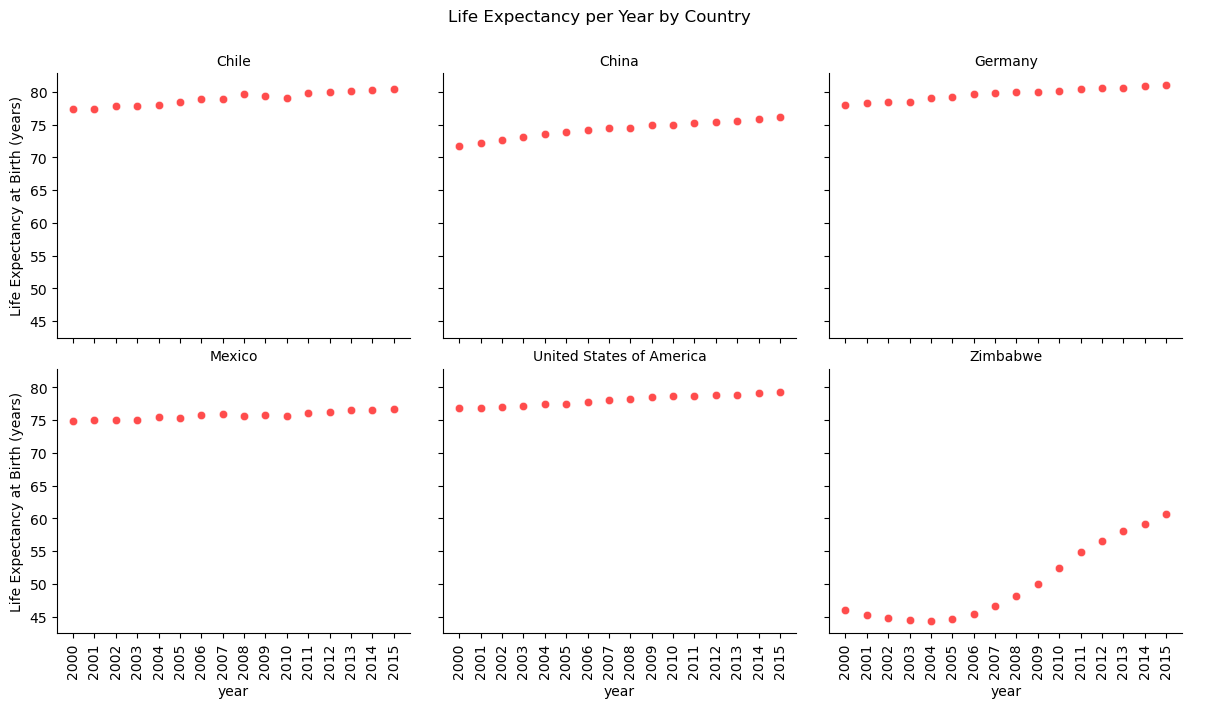

<Figure size 640x480 with 0 Axes>

In [906]:
# Grid for Life Expectancy

g = sns.FacetGrid(gdp_life, col='country', col_wrap=3, height=4)
g.map(sns.scatterplot, 'year', 'life_expectancy', alpha=0.7, color='r')
g.add_legend()
g.set_axis_labels('year', 'Life Expectancy at Birth (years)')
g.set_titles('{col_name}')
for ax in g.axes.flat:
    ax.set_xticks(gdp_life['year'].unique())  # Set x-ticks based on unique years
    ax.set_xticklabels(gdp_life['year'].unique(), rotation=90)  # Set x-tick labels
plt.subplots_adjust(top=0.9, bottom=0.2)
g.fig.suptitle('Life Expectancy per Year by Country')
plt.savefig('life_exp.png')
plt.show()
plt.clf()

#### Analysis:

According to the data, I can observe the following life expectancy developments between 2000 and 2015:

- **Chile, Mexico, China, United States of America (USA), and Germany**: These countries have the highest life expectancy of the six countries and follow a similar steady/increasing trend.

-  **Zimbabwe**: Shows a very distinct profile, with life expectancy decreasing between 2000 and 2004, remaining almost steady between 2004 and 2005 and then increasing until 2015, reaching nearly 61 (60.7) years.

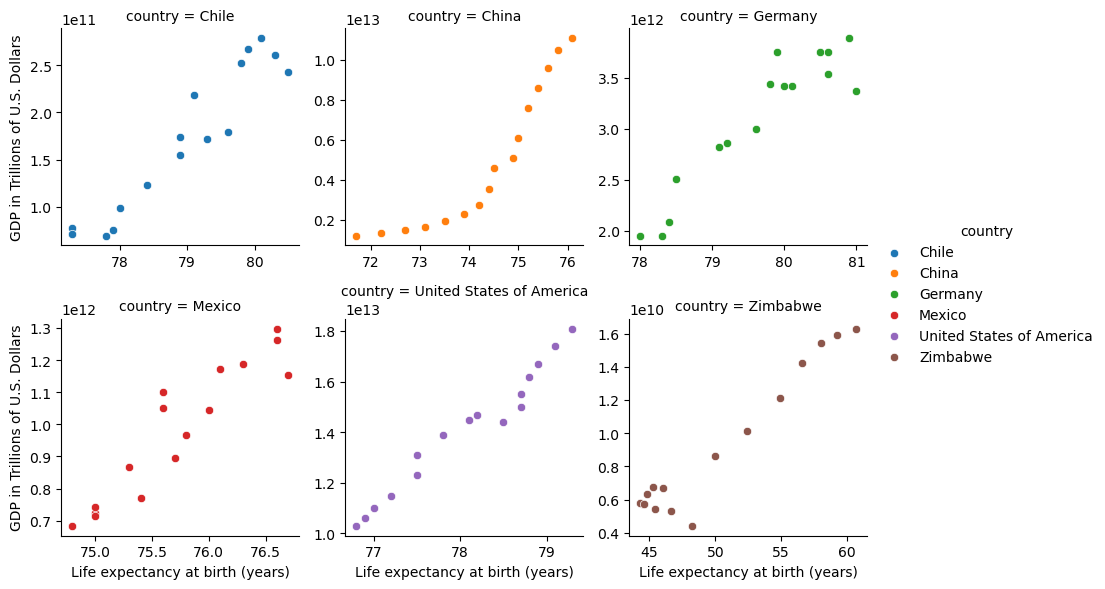

<Figure size 640x480 with 0 Axes>

In [908]:
# Grid for GDP vs Life Expectancy

graph = sns.FacetGrid(gdp_life, col="country", col_wrap=3,
                      hue = "country", sharey = False, sharex = False)
graph = (graph.map(sns.scatterplot,"life_expectancy", "gdp")
         .add_legend()
         .set_axis_labels("Life expectancy at birth (years)", "GDP in Trillions of U.S. Dollars")); 
plt.savefig('gdp_lexp.png')
plt.show() 
plt.clf()


#### Analysis:

According to the data, I can observe the following, about gdp as function of life expectancy:

- **General Trend**: Most countries exhibit a positive correlation between GDP and life expectancy, indicating that as GDP increases, life expectancy tends to increase as well;

- **Variability**: Countries Like Chile, Mexico, Germany, and Zimbabwe show some variability in this relationship, suggesting that other factors might be influencing life expectancy in these countries;

- **Inflexion Points**: Chile and Mexico display inflexion points in their GDP, which could indicate periods of economic change or instability;

- **Zimbabwe**: Zimbabwe shows a unique pattern with a decrease in life expectancy followed by an increase, which might reflect historical events or policy changes affecting the country's health and economy. 

# 4 - Hypothesis Tests

## 4.1 - Attempt to answer the first project scope question: "What is the relationship between life expectancy and GDP for these six countries?"

###### Test 1 ---> Correlation Analysis

- **Null Hypothesis (H0)**: There is no correlation between GDP and life expectancy.

- **Alternative Hypothesis (H1)**: There is a significant correlation between GDP and life expectancy.

Implementation:

In [912]:
correlation = gdp_life['gdp'].corr(gdp_life['life_expectancy']) 
print(f'Correlation: {correlation}')

Correlation: 0.3432067484491559


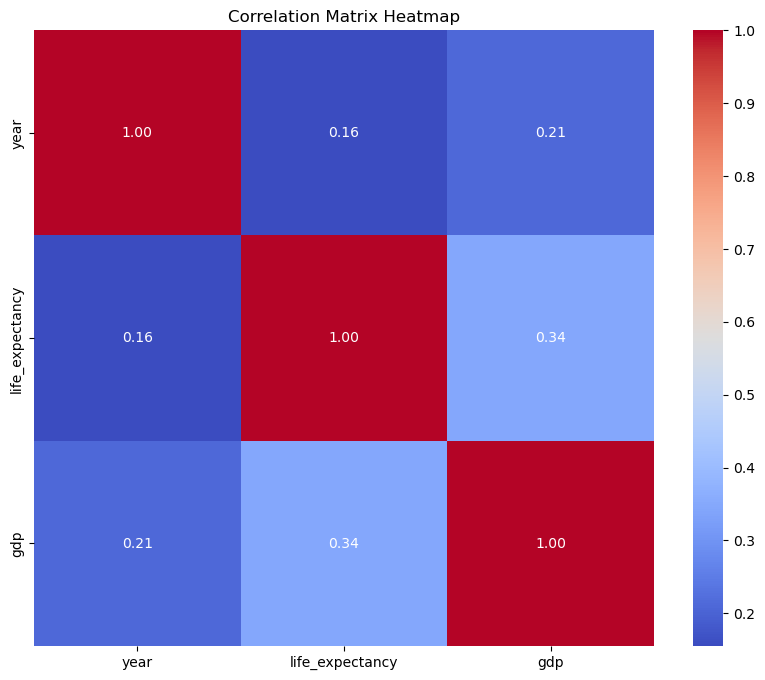

In [915]:
import seaborn as sns 
import matplotlib.pyplot as plt 

# Calculate the correlation matrix 
correlation_matrix = gdp_life.drop(columns=['country']).corr() 

# Create a heatmap 
plt.figure(figsize=(10, 8)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f') 
plt.title('Correlation Matrix Heatmap')
plt.savefig('corr_png')
plt.show()

###### Test 2 ---> Spearman's Rank Correlation

- **Null Hypothesis (H0)**: There is no monotonic relationship between GDP and life expectancy.

- **Alternative Hypothesis (H1)**: There is a significant monotonic relationship between GDP and life expectancy.

Implementation:

In [917]:
from scipy.stats import spearmanr 

# Calculate Spearman's rank correlation 
corr, p_value = spearmanr(gdp_life['gdp'], gdp_life['life_expectancy']) 
print(f'Spearman correlation: {corr}, p-value: {p_value}')

Spearman correlation: 0.4472391846883402, p-value: 4.9179744476790014e-06


###### Interpretation for both tests:

- **Test 1**: The correlation coefficient of 0.343 indicates a moderate positive correlation between GDP and life expectancy. This means that as GDP increases, life expectancy tends to increase as well (China and USA are examples of that). However, the relationship is not very strong.

- **Test 2**: The Spearman correlation coefficient of 0.447 indicates a moderate positive monotonic relationship between GDP and life expectancy. The p-value of 4.918e-16 is very small, indicating that the correlation is statistically significant. This means that there is a significant monotonic relationship between GDP and life expectancy, where higher GDP is associated, in general, with higher life expectancy. The lower Spearman correlation coefficient (0.447) could be explained by the variability observed in the GDP as a function of life expectancy by country, as shown in the facet grid charts at the EDA section (see the chart analysis, too). Since this relationship is not linear, Test 2 is more suitable to explain and support my answer to the first question of this project.

###### **Note**:

I can not use regression tests because my data is not following a normal distribution. The data are right-skewed or left-skewed.

## 4.2 - Attempt to answer the second project scope question: "What is the variation in GDP per year for each country? Are there significant variations?"

###### Test ANOVA for GDP ---> Analysis of Variance

- **Null Hypothesis (H0)**: There is no significant difference in GDP among the six countries.

- **Alternative Hypothesis (H1)**: There is a significant difference in GDP among the six countries.

Implementation:

In [927]:
from scipy.stats import f_oneway 

# Separate the data into groups 
gdp_groups = [gdp_life[gdp_life['country'] == country]['gdp'] for country in gdp_life['country'].unique()] 

# Perform ANOVA 
f_stat, p_val = f_oneway(*gdp_groups) 
print(f'p-value: {p_val}')

p-value: 1.0177777153618003e-41


#### 4.2.1 - Tukey's Test for GDP

In [936]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd 

# Perform Tukey's HSD test 
tukey_results = pairwise_tukeyhsd(endog=gdp_life['gdp'], groups=gdp_life['country'], alpha=0.05) 
print(tukey_results)

                                    Multiple Comparison of Means - Tukey HSD, FWER=0.05                                    
         group1                   group2                meandiff      p-adj         lower               upper        reject
---------------------------------------------------------------------------------------------------------------------------
                   Chile                    China  4787924904984.6875    0.0  2971740794738.4717   6604109015230.903   True
                   Chile                  Germany  2924986779984.6875 0.0001   1108802669738.472   4741170890230.903   True
                   Chile                   Mexico   806861779984.6875 0.7877  -1009322330261.528  2623045890230.9033  False
                   Chile United States of America  13905211154984.688    0.0  12089027044738.473  15721395265230.902   True
                   Chile                 Zimbabwe    -160726265420.25 0.9998 -1976910375666.4656  1655457844825.9656  False
        

Interpretation for both tests:

- **ANOVA for GDP**: The p-value of 1.018e-41 is extremely small, indicating that are significant differences in GDP among the six countries. This means that GDPs of the countries are not all the same and vary significantly. However, the ANOVA test does not tell us which pairs of countries have significant differences.

- **Tukey's HSD Test for GDP**: The results indicate that there are significant differences in GDP between several pairs of countries. According to the test output, the country pairs with significant differences in GDP are:
- Chile-China
- Chile-Germany
- Chile-USA
- China-Germany
- China-Mexico
- China-USA
- China-Zimbabwe
- Germany-Mexico
- Germany-USA
- Germany-Zimbabwe
- Mexico-USA
- USA-Zimbabwe.

## 4.3 - Attempt to answer the third project scope question: "What is the variation in life expectancy per year for each country? Are there significant variations?"

###### Test ANOVA for Life Expectancy ---> Analysis of Variance

- **Null Hypothesis (H0)**: There is no significant difference in life expectancy among the six countries.

- **Alternative Hypothesis (H1)**: There is a significant difference in life expectancy among the six countries.

Implementation:

In [941]:
# Separate the data into groups
life_ex_groups = [gdp_life[gdp_life['country'] == country]['life_expectancy'] for country in gdp_life['country'].unique()]

# Perform ANOVA

f_stat, p_val = f_oneway(*life_ex_groups)
print(f'p-value: {p_val}')

p-value: 7.885135700050126e-55


#### 4.3.1 - Tukey's Test for Life Expectancy

In [943]:
# Perform Tukey's HSD test
tukey_results = pairwise_tukeyhsd(endog=gdp_life['life_expectancy'], groups=gdp_life['country'], alpha=0.05)
print(tukey_results)

                   Multiple Comparison of Means - Tukey HSD, FWER=0.05                    
         group1                   group2          meandiff p-adj   lower    upper   reject
------------------------------------------------------------------------------------------
                   Chile                    China  -4.6812    0.0  -7.3454  -2.0171   True
                   Chile                  Germany   0.7125 0.9704  -1.9516   3.3766  False
                   Chile                   Mexico   -3.225 0.0085  -5.8891  -0.5609   True
                   Chile United States of America  -0.8812 0.9283  -3.5454   1.7829  False
                   Chile                 Zimbabwe   -28.85    0.0 -31.5141 -26.1859   True
                   China                  Germany   5.3938    0.0   2.7296   8.0579   True
                   China                   Mexico   1.4563 0.6061  -1.2079   4.1204  False
                   China United States of America      3.8  0.001   1.1359   6.4641   True

Interpretation for both tests:

- **ANOVA for Life Expectancy**: The p-value of 7.885e-55 is extremely small, indicating that there are significant differences in life expectancy among the six countries. This means that the life expectancy of the countries is not all the same and varies significantly. However, the ANOVA test does not tell us which pairs of countries have significant differences.

- **Tukey's HSD Test for Life Expectancy**: The results indicate that there are significant differences in life expectancy between several pairs of countries. According to the test output, the country pairs with significant differences in life expectancy are:
- Chile-China
- Chile-Mexico
- Chile-Zimbabwe
- China-Germany
- China-USA
- China-Zimbabwe
- Germany-Mexico
- Germany-Zimbabwe
- Mexico-Zimbabwe
- USA-Zimbabwe.

# 5 - Results Discussion and final conclusions

## 5.1 - Results Discussion

#### According to all data analysis:

##### 5.1.1 - Relationship Between Life Expectancy and GDP

- There is a positive correlation between GDP and life expectancy. Countries with higher GDP's such as the United States and Germany, tend to have higher life expectancies. Conversely, countries with lower GDPs, like Zimbabwe, have lower life expectancies. This suggests that economic prosperity is associated with better health outcomes and longer life spans, according with facet grid charts.

##### 5.1.2 - Variation in GDP Per Year for Each Country

- **Chile and Zimbabwe**: Both countries exhibit steady, low GDP development.

- **Mexico**: Shows low GDP development with some fluctuations.

- **United States of America**: Demonstrates high and increasing GDP development.

- **China**: Experiences significant GDP growth, starting from a very low GDP in 2000 and reaching a mid-high GDP by 2015.
  
- **Germany**: Has moderately high GDP development compared to Chile, Mexico and Zimbabwe, but lower than the USA and China. Germany's GDP development is almost steady, with some significant fluctuations in 2004, 2008, and 2011.

##### 5.1.3 - Variation in Life Expectancy Per Year for Each Country

- **Chile, Mexico, China, USA, and Germany**: These countries have the highest life expectancy of the six countries and follow a similar steady/increasing trend.

- **Zimbabwe**: Shows a distinct profile, with life expectancy decreasing between 2000 and 2003, remaining steady between 2003 and 2005, and then increasing until 2015, reaching nearly 60 years.

## 5.2 - Final Conclusions

Based on the analysis, it is evident that there is a significant relationship between GDP and life expectancy, although the correlation is moderate (Spearman correlation: 0.447, p-value: 4.918e-06). Countries with higher GDPs tend to have higher life expectancies, indicating that economic prosperity is linked to better health outcomes. 

However, there are countries (Chile, Mexico and Germany) that despite their low or mid-lowerGDP, they have high life expectancy, as shown on facet grid charts.

The variations in GDP and life expectancy among the six countries highlight the disparities in economic development and health outcomes. 
Future research could explore the underlying factors contributing to these disparities and identify strategies to improve life expectancy in countries with lower GDPs.

# 6 - Tests and Failures

In this section I have included all the code lines from my attemps to normalize the data. Although I was not successful, these code lines remain an important resource for future purposes. 

## 2.5 - Data Transforming

In [952]:
# Log transformation for right-skewed GDP

#gdp_life['log_gdp'] = np.log(gdp_life['gdp'])
#print(gdp_life.head())
#print("Shapiro-Wilk test for GDP:", shapiro(gdp_life['gdp']), "\n")

# Square transformation for left-skewed life expectancy
#gdp_life['sqr_life_expectancy'] = gdp_life['life_expectancy'] ** 2
#print(gdp_life.head())
#print("Shapiro-Wilk test for Life Expectancy:", shapiro(gdp_life['life_expectancy']), "\n")

# Log transformation for left-skewed life expectancy
#gdp_life['log_life_expectancy'] = np.log(gdp_life['life_expectancy']) 
#print(gdp_life.head())
#print("Shapiro-Wilk test for Life Expectancy:", shapiro(gdp_life['life_expectancy']), "\n")

## 2.6 - Data Scalling

In [954]:
# Standardization

#def standardize_data(df, columns):
    #scaler = StandardScaler()
    #df[columns] = scaler.fit_transform(df[columns])
    #return df
    
# Standardization for wild gdp
#gdp_standardize = standardize_data(gdp_life, ['gdp'])
#print(gdp_standardize.head(), "\n")

# Standardization for wild life_expectancy
#life_expectancy_standardize = standardize_data(gdp_life, ['life_expectancy'])
#print(gdp_standardize.head(), "\n")

In [955]:
# Standardization for log gdp
#log_gdp_standardize = standardize_data(gdp_life, ['log_gdp'])
#print(log_gdp_standardize.head(), "\n")

# Standardization for square life expectancy
#sqr_life_expectancy_standardize = standardize_data(gdp_life, ['sqr_life_expectancy'])
#print(sqr_life_expectancy_standardize.head(), "\n")

In [956]:
# Normalization

#def normalize_data(df, columns):
    #scaler = MinMaxScaler()
    #df[columns] = scaler.fit_transform(df[columns])
    #return df
    
# Normalization for wild gdp
#gdp_normalize = normalize_data(gdp_life, ['gdp'])
#print(gdp_normalize.head(), "\n")

# Normalization for wild life expectancy
#life_expectancy_normalize = normalize_data(gdp_life, ['life_expectancy'])
#print(life_expectancy_normalize.head(), "\n")

In [957]:
# Histogram for GDP with log scale
#plt.figure(figsize=(10, 6))
#plt.hist(gdp_life['gdp'], bins=30, log=True)
#plt.title('GDP Distribution with Logarithmic Scale')
#plt.xlabel('GDP')
#plt.ylabel('Frequency')
#plt.show()


In [958]:
# Density plot
#plt.figure(figsize=(10, 6))
#sns.kdeplot(data=gdp_life, x='gdp', hue='country', fill=True)
#plt.title('GDP Density Plot by Country')
#plt.show()

#plt.figure(figsize=(10, 6))
#sns.kdeplot(data=gdp_life, x='life_expectancy', hue='country', fill=True)
#plt.title('Life Expectancy Density Plot by Country')
#plt.show()

In [959]:
# Facet Grids

#g = sns.FacetGrid(gdp_life, col='country', col_wrap=3, height=4)
#g.map(sns.histplot, 'gdp', bins=30)
#g.set_titles("{col_name}")
#g.fig.suptitle('GDP Distribution by Country', y=1.02)
#plt.show()

#g = sns.FacetGrid(gdp_life, col='country', col_wrap=3, height=4)
#g.map(sns.histplot, 'life_expectancy', bins=30)
#g.set_titles("{col_name}")
#g.fig.suptitle('Life Expectancy Distribution by Country', y=1.02)
#plt.show()

In [960]:
# box plots

#plt.figure(figsize=(10, 6))
#sns.boxplot(x='country', y='gdp', data=gdp_life)
#plt.title('GDP Distribution by Country')
#plt.show()

#plt.figure(figsize=(10, 6))
#sns.boxplot(x='country', y='life_expectancy', data=gdp_life)
#plt.title('Life Expectancy Distribution by Country')
#plt.show()

In [961]:
# Line plots 

# Line plot for GDP with hue for Country
#plt.figure(figsize=(12, 6))
#sns.lineplot(data=gdp_life, x='year', y='log_gdp', hue='country', marker='o')
#plt.title('GDP Over Time by Country')
#plt.xlabel('year')
#plt.ylabel('log_gdp')
#plt.grid(True)
#plt.show()

In [962]:
# Line plot for Life Expectancy with hue for Country
#plt.figure(figsize=(12, 6))
#sns.lineplot(data=gdp_life, x='year', y='log_life_expectancy', hue='country', marker='o')
#plt.title('Life Expectancy Over Time by Country')
#plt.xlabel('year')
#plt.ylabel('life_expectancy')
#plt.grid(True)
#plt.show()

#### 3.2.2 - Visualizations after transformation

In [965]:
# Visualize the transformed data for log and square transforms
#fig, axes = plt.subplots(1, 2, figsize=(12, 6))
#sns.histplot(log_gdp_standardize['log_gdp'], ax=axes[0], kde=True)
#axes[0].set_title('Log-transformed GDP')
#sns.histplot(sqr_life_expectancy_standardize['sqr_life_expectancy'], ax=axes[1], kde=True)
#axes[1].set_title('Squared Life Expectancy')
#plt.show()

In [966]:
# Histogram for GDP
#plt.figure(figsize=(10, 5))
#sns.histplot(gdp_life['log_gdp'], kde=True)
#plt.title('Log-GDP Distribution')
#plt.xlabel('Log-GDP')
#plt.ylabel('Frequency')
#plt.show()
#plt.clf()

In [967]:
# Histogram for Life Expectancy
#plt.figure(figsize=(10,5))
#sns.histplot(gdp_life['sqr_life_expectancy'], kde=True)
#plt.title('Square Life Expectancy Distribution')
#plt.xlabel('Square Life Expectancy at Birth (years)')
#plt.ylabel('Frequency')
#plt.show()

In [968]:
# Histogram for GDP
#plt.figure(figsize=(10, 5))
#sns.histplot(gdp_standardize['gdp'], kde=True)
#plt.title('Standardized GDP Distribution')
#plt.xlabel('Standardized GDP')
#plt.ylabel('Frequency')
#plt.show()
#plt.clf()

In [969]:
# Histogram for Life Expectancy
#plt.figure(figsize=(10,5))
#sns.histplot(life_expectancy_standardize['life_expectancy'], kde=True)
#plt.title('Standardized Life Expectancy Distribution')
#plt.xlabel('Standardized Life Expectancy at Birth (years)')
#plt.ylabel('Frequency')
#plt.show()

In [970]:
# Histogram for GDP after normalization
#plt.figure(figsize=(10, 5))
#sns.histplot(gdp_normalize['gdp'], kde=True)
#plt.title('Normalized GDP Distribution')
#plt.xlabel('Normalized GDP')
#plt.ylabel('Frequency')
#plt.show()
#plt.clf()

In [971]:
# Histogram for Life Expectancy after normalization
#plt.figure(figsize=(10,5))
#sns.histplot(life_expectancy_normalize['life_expectancy'], kde=True)
#plt.title('Normalized Life Expectancy Distribution')
#plt.xlabel('Normalized Life Expectancy at Birth (years)')
#plt.ylabel('Frequency')
#plt.show()